# Importing Packages

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Image Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
x_train = train_datagen.flow_from_directory('C:\\Users\\yashwanth\\Guided-proj\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\train',target_size = (128,128),batch_size=8,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('C:\\Users\\yashwanth\\Guided-proj\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test',target_size = (128,128),batch_size=8,class_mode = 'categorical')

Found 5339 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [4]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [5]:
x_test.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# Central Neural Network

In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())

# Hidden Layers

In [10]:
model.add(Dense(128 ,activation='relu'))
model.add(Dense(64,activation = 'relu'))

# Output Layer

In [11]:
model.add(Dense(6,activation = 'softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                        

In [15]:
model.fit_generator(x_train,steps_per_epoch=5339//8,validation_data=x_test,validation_steps=1686//8,epochs=10)

Epoch 1/10


C:\Users\yashwanth\AppData\Local\Temp\ipykernel_14704\2589044667.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=5339//8,validation_data=x_test,validation_steps=1686//8,epochs=10)


667/667 [==============================] - 173s 259ms/step - loss: 0.2915 - accuracy: 0.8987 - val_loss: 0.4704 - val_accuracy: 0.8607
Epoch 2/10
667/667 [==============================] - 146s 219ms/step - loss: 0.2933 - accuracy: 0.9010 - val_loss: 0.1680 - val_accuracy: 0.9452
Epoch 3/10
667/667 [==============================] - 132s 197ms/step - loss: 0.1930 - accuracy: 0.9330 - val_loss: 0.1837 - val_accuracy: 0.9387
Epoch 4/10
667/667 [==============================] - 133s 199ms/step - loss: 0.2119 - accuracy: 0.9259 - val_loss: 0.1565 - val_accuracy: 0.9494
Epoch 5/10
667/667 [==============================] - 133s 199ms/step - loss: 0.1663 - accuracy: 0.9441 - val_loss: 0.1023 - val_accuracy: 0.9673
Epoch 6/10
667/667 [==============================] - 133s 199ms/step - loss: 0.1232 - accuracy: 0.9584 - val_loss: 0.1349 - val_accuracy: 0.9577
Epoch 7/10
667/667 [==============================] - 138s 207ms/step - loss: 0.1166 - accuracy: 0.9599 - val_loss: 0.1330 - val_accura

# Saving Model

In [16]:
model.save("fruit.h5")

# Testing Model

# Loading Model

In [17]:
model =load_model("fruit.h5")

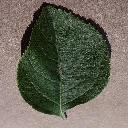

In [18]:
img = image.load_img("C:\\Users\\yashwanth\\Guided-proj\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Apple___healthy\\0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG",target_size=(128,128))
img


In [19]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

1/1 [==============================] - 0s 153ms/step


'Apple___healthy'

In [20]:
img = image.load_img("C:\\Users\\yashwanth\\Guided-proj\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Peach___Bacterial_spot\\00ddc106-692e-4c67-b2e8-569c924caf49___Rutg._Bact.S 1228.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

1/1 [==============================] - 0s 33ms/step


'Peach___Bacterial_spot'

In [21]:
img = image.load_img("C:\\Users\\yashwanth\\Guided-proj\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\Apple___Black_rot\\0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[pred[0]]

1/1 [==============================] - 0s 27ms/step


'Apple___Black_rot'